## P8.1.1
-----

In [12]:
import numpy as np
from scipy.special import binom as binomial


def pascal(n_max: int) -> None:
    for n in range(n_max):
        fmt = " {:^3d}"*(n+1)
        pascal_row = fmt.format(*np.array(binomial(n,np.arange(n+1)), dtype="i4"))
        print("{:^40s}".format(pascal_row))


pascal(8)


                    1                   
                  1   1                 
                1   2   1               
              1   3   3   1             
            1   4   6   4   1           
          1   5  10  10   5   1         
        1   6  15  20  15   6   1       
      1   7  21  35  35  21   7   1     


## P8.1.2
-----

Maximum resolving power for pupil diameter 3.0 mm at 500 nm is:   41.9 arcsec


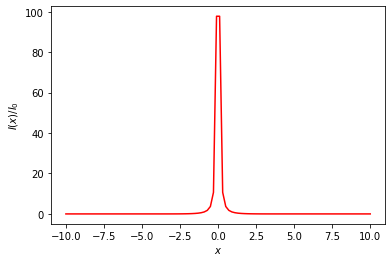

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-10, 10, 100)

j_inc = lambda x: jn(1, x) / x


a, lam = 1.5, 500

k = 2 * np.pi / (lam / 1.0e6)

x1 = jn_zeros(1, 1)[0]
theta1 = np.arcsin(x1 / k / a)

theta1 = np.degrees(theta1) * 60 * 60

print(
    f"Maximum resolving power for pupil diameter {2*a} mm at {lam} nm is:  {theta1: .1f} arcsec"
)

airy = (2 * j_inc(x) / x) ** 2
ax.plot(x, airy, "r-")
ax.set_xlabel("$x$")
ax.set_ylabel("$I(x)/I_0$")
plt.show()


## P8.1.3
-----

In [18]:
import scipy.constants as pc

def get_wv(D0):
    E = D0 * pc.kilo / pc.N_A 
    lam = pc.h * pc.c / E 
    return lam / pc.nano   

print(get_wv(497))

240.6973151684044


## P8.1.4
-----

Maximum percentage error in approximation: 7.77


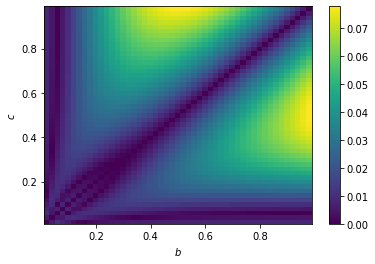

In [17]:
from numpy import pi, arccos, sin
from scipy.special import ellipkinc, ellipeinc


def ellipsoid_surface(a, b, c):
    a, b, c = sorted([a, b, c], reverse=True)

    if a == c:
        return 4 * pi * a**2
    cos_phi = c / a
    phi = arccos(cos_phi)
    cos_phi_sq = cos_phi**2
    sin_phi_sq = 1 - cos_phi_sq

    k_sq = a**2 * (b**2 - c**2) / b**2 / (a**2 - c**2)
    k2 = round(k_sq, 8)

    return 2 * pi * c**2 + 2 * pi * a * b / sin(phi) * (
        ellipkinc(phi, k2) * cos_phi_sq + ellipeinc(phi, k2) * sin_phi_sq
    )


def ellipsoid_surface_approx(a, b, c):
    a, b, c = reversed(sorted([a, b, c]))
    cos_phi = c / a
    phi = arccos(cos_phi)
    r = phi / sin(phi)
    return 2 * np.pi * c**2 + 2 * np.pi * a * b * r * (
        1
        - (b**2 - c**2) 
        / 6
        / b**2
        * r**2
        * (1 - (3 * b**2 + 10 * c**2) / 56 / b**2 * r**2)
    )


a = 1
db = 0.02
nb = int((1 - 2*db)/db + 1)
bgrid = np.linspace(db, 1-db, nb)

de = np.zeros((nb,nb))
for i, b in enumerate(bgrid):
    for j in range(0,i+1):
        c = bgrid[j]
        S_exact = ellipsoid_surface(a, b, c)
        S_approx = ellipsoid_surface_approx(a, b, c)
        de[i,j] = np.abs(S_exact - S_approx)/S_exact 
de = de + de.T - np.diag(de.diagonal())

maxde = np.max(np.abs(de))
print(f"Maximum percentage error in approximation: {maxde*100:.2f}")

import matplotlib.pyplot as plt
plt.pcolor(bgrid, bgrid, de)
plt.xlabel(r"$b$")
plt.ylabel(r"$c$")
plt.colorbar()
plt.show()


## P8.1.5
-----

C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_53028\1278337679.py:18: RuntimeWarning: divide by zero encountered in true_divide
  H_jacob = H0 - Q/4/np.pi/T * np.log(np.exp(-euler_gamma)/u)


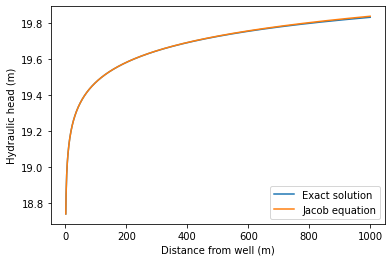

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1

Q = 1000
H0 = 20
S = 0.0003
T = 1000

t = 1

r = np.linspace(0, 1000, 1000)

u = r**2 * S / 4 / T / t
H = H0 - Q/4/np.pi/T * exp1(u)

euler_gamma = 0.5772156649015329
H_jacob = H0 - Q/4/np.pi/T * np.log(np.exp(-euler_gamma)/u)

plt.plot(r,H, label="Exact solution")
plt.plot(r,H_jacob, label="Jacob equation")
plt.xlabel(r"Distance from well (m)")
plt.ylabel(r"Hydraulic head (m)")
plt.legend(loc=4)
plt.show()


## P8.1.6
-----

In [20]:
import numpy as np
from scipy.special import k0, k1, i0, i1

T_0, T_e = 400, 300

w, r_0, r_1 = 0.1 * 1.0e-3, 0.005, 0.01
h_c, kappa = 10, 200

beta = np.sqrt(h_c / kappa / w)
u0, u1 = beta * r_0, beta * r_1

eta = 2*r_0/beta * (k1(u0) * i1(u1) - i1(u0) * k1(u1)) / (r_1**2 - r_0**2) / (k0(u0) * i1(u1) + i0(u0) * k1(u1))

print(f"eta = {eta:.3f}")
fin_area = 2 * np.pi * (r_1**2 - r_0**2)
Q_dot = eta * h_c * fin_area * (T_0 - T_e)
print(f"Q_dot = {Q_dot:.2f} W")

eta = 0.994
Q_dot = 0.47 W
